In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


## Iniciando a fase de data wrangling

In [2]:
# Renomeando nomes das colunas para PT-BR
nome = {"mileage_per_year": "Milhas_Por_Ano", "model_year": "Modelo_Ano", "price": "Preco", "sold": "Vendido"}
dados.rename(columns= nome, inplace = True)

In [3]:
# Substituindo os valores da classe Vendido Yes = 1 e No = 0
map_vendido = {"yes": 1,"no": 0}
dados['Vendido'] = dados.Vendido.map(map_vendido)

In [4]:
# Criando campo com a idade do modelo usando DateTimeNow e Modelo_Ano
ano = datetime.now().year
dados['Idade_Modelo'] = ano - dados.Modelo_Ano

In [5]:
# Criando campo de Kilometros por Ano
dados['Km_Por_Ano'] = dados.Milhas_Por_Ano * 1.60

In [6]:
# Removendo colunas indesejadas: Unnamed: 0, Milhas_Por_Ano, Modelo_Ano
dados.drop(columns = ['Unnamed: 0', 'Milhas_Por_Ano', 'Modelo_Ano'], axis = 1, inplace = True)

In [7]:
# Fazendo a separação dos dados para uso no modelo de ML usando LinearSVC
SEED = 5
np.random.seed(SEED)

x = dados[['Preco', 'Idade_Modelo', 'Km_Por_Ano']]
y = dados['Vendido']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)
print(f'Treino X = {X_train.shape[0]}\nTeste X = {X_test.shape[0]}\nTreino Y = {y_train.shape[0]}\nTeste Y = {y_test.shape[0]}')

Treino X = 7500
Teste X = 2500
Treino Y = 7500
Teste Y = 2500


In [8]:
# Criando modelo preditivo usando LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)

previsoes = model.predict(X_test)
score_rate = accuracy_score(y_test, previsoes)
print(score_rate)

0.4728


c:\users\roger\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
# Usando DummyClassifier strategy = stratified
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
previsoes = dummy.predict(X_test)

score_rate = accuracy_score(y_test, previsoes)
print(score_rate)

0.5244


In [10]:
# Usando DummyClassifier strategy = most_frequent
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
previsoes = dummy.predict(X_test)

score_rate = accuracy_score(y_test, previsoes)
print(score_rate)

0.58


In [11]:
# Usando DummyClassifier strategy = most_frequent e o atributo score
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

#score_rate = accuracy_score(y_test, previsoes)
#print(score_rate)

0.58

In [12]:
# Criando modelo preditivo usando SVC e normalização de escalas
model = SVC()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)

previsoes = model.predict(X_test)
score_rate = accuracy_score(y_test, previsoes)
print(score_rate)

0.7748


In [28]:
# Criando modelo preditivo usando DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

model = DecisionTreeClassifier(max_depth = 3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)

previsoes = model.predict(X_test)
score_rate = accuracy_score(y_test, previsoes)
print(score_rate)

0.7928


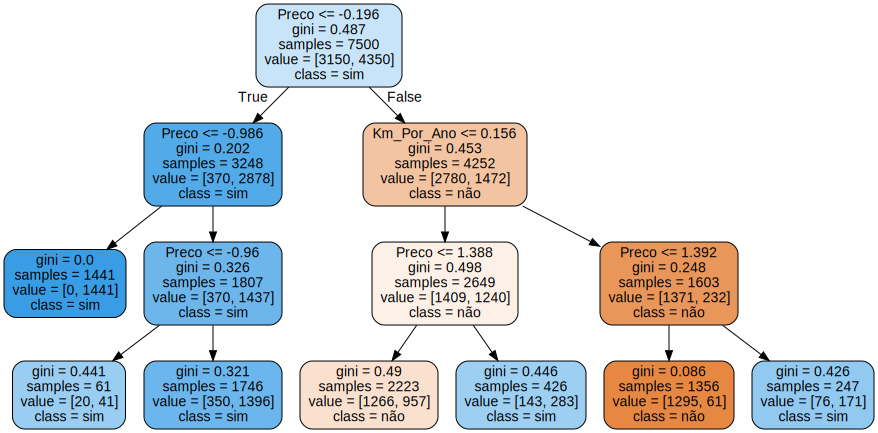

In [29]:
# Exportando arquivo do graphviz
labels = ['Preco', 'Idade_Modelo', 'Km_Por_Ano']
class_label = ['Vendido']
gv = export_graphviz(model, out_file = None, feature_names = labels, filled = True, rounded = True, class_names = ["não", 'sim'])

graphviz.Source(gv)